<a href="https://colab.research.google.com/github/Adityac115/Housing_Price_Prediction/blob/master/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd # Data Manipulation, Data Cleaning, Data Exploration, Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:

url = 'https://raw.githubusercontent.com/Adityac115/Housing_Price_Prediction/master/Housing.csv'
df = pd.read_csv(url)

**Data Inpection**

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Data Cleaning**

In [9]:
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

**Data Preperation**

In [10]:
# changing from yes and no to 0 and 1 
var=['mainroad',  'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def bmap(x):
  return x.map({'yes' : 1, "no" :0})

df[var]=df[var].apply(bmap)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [12]:
dummy=pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [13]:
dummy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [14]:
df=pd.concat([df,dummy],axis=1)

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [16]:
df.drop(['furnishingstatus'] , axis=1 , inplace =True)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [18]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [19]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished']]
y=df['price']

In [20]:
df.ndim

2

In [21]:
X.ndim

2

In [22]:
y.ndim

1

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

In [27]:
coeff_df

,Coefficient
area,233.722183
bedrooms,117102.035973
bathrooms,933263.725983
stories,471345.057978
mainroad,547213.120896
guestroom,251899.652312
basement,300523.592704
hotwaterheating,876733.955325
airconditioning,897144.539834
parking,296347.635809


In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([ 3488198.27691367,  8346828.14488228,  3345681.01612915,
        3365453.53729631,  2850910.60250493,  7263165.28784354,
        6574182.48798937,  4394023.70440397,  3982964.7285184 ,
        4688755.38912992,  2372924.52140771,  3896563.56065042,
        3657606.26650986,  5070859.4748516 ,  3775290.19711177,
        3758391.25685135,  5018023.50737699,  4136986.8725414 ,
        6154179.02918092,  6505385.10799352,  5107452.29198952,
        6143663.24622473,  4301168.66062589,  3415361.58565042,
        4906415.0747856 ,  2622216.99417704,  4789559.27354992,
        3016727.94700216,  5731806.4946149 ,  2804520.2972063 ,
        4105822.78898576,  4646478.73165911,  3809609.72958802,
        5278263.34172411,  6427090.76004245,  2861187.02270626,
        2789901.89054056,  6314927.02997829,  5074355.81332497,
        4642532.55566924,  3592805.12330029,  2224106.53356688,
        3748372.24537225,  7244903.18596003,  3249637.25090934,
        4770751.71762155,  3722694.21271

In [30]:
  model.predict([[7420,	4,	2,	3,	1,	0,	0,	0,	1,	2,	1	,0	,0]])

array([8153739.90556192])

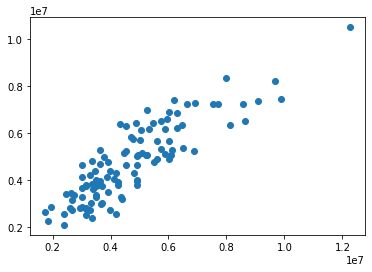

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
r2_score(y_test, y_pred)

0.7560355994624843